# Proyek Analisis Data: Bike Sharing Dataset ([Source](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset))
- **Nama:** Ica Nur Halimah
- **Email:** icanur468@gmail.com
- **ID Dicoding:** icaacoo

## Menentukan Pertanyaan Bisnis

- Apa faktor yang mempengaruhi total rental bikes?
- Bagaimana strategi yang bisa dilakukan untuk meningkatkan total rental bikes?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
files.upload()

Saving Bike-sharing-dataset.zip to Bike-sharing-dataset.zip


{'Bike-sharing-dataset.zip': b'PK\x03\x04\x14\x00\x02\x00\x08\x00\xa1k\x94C\xeav;%\xd1\x08\x00\x00\xe7\x15\x00\x00\n\x00\x00\x00Readme.txt\xadXMo\xdbH\x12=\xc7\x80\xffC!\'\x07\xa1h\xc9\x1f\xf1\x8c\x16\x06\xc6\xb1\xe3I\x16\xd9\xd9 \x9e \x87\xc1\x1eZd\x8b\xec5\xc9\xe6v\x93\x92\xb5F\xfe\xfb\xbe\xaan\xea\xc3I\x06\xd1`}\xb1\xd8\xea\xae\xaez\xf5\xeaUQ\x97\x97?\xfawx\xf0\xda\xdck\xba+\x953MA7\xaaS^w\x87\x07\x97{X8<x\xabrC\xb7\xaaQZ\x8f~\xe7\x85\xf7jf\x9d\xea\xac[\x91\x9d\xd3\x95\xeb\xcc\xdcdFU\xf4\xae\xe9tU\x99B7\x99&\xd5\xe4t\xa33\xe3\x8dm\xe8\xaeo[\xeb::z\xff\xee\xea\xea\xe6EB\x9f\x1a\xb3\xd0\xce\x9bNl|\xc0w\xf6\xf0\xe0\xddoo\xee\xae\xc3CB\xd7\xaan{O\xb9\xa2\xdb7\x9f>\x1c\x1e|\xec\x15\xdd\xb8\x94>\xda\x99\xc6\x06\xbauF\xf9\x84N/~:<8;\x19\x8fiDg\xaf\xce\x87\xd3\xfc\xaf/T\xc5\xfe\xee\x110\x10S\xd9}\xe1l\x0f\xef\xf7:\x17\xb1\xf6\x11k\xbf\xf2\x9d\xae=)\xa7\xa9\xd1K\x02&\x1a\x981\x16\x88\xb7s\xc0\x94\x1f\x00\xda\x8c\x8f9\xddt\xaa\xf2\xb4,5\x0e,K[ij\x9d\xcd\xb4\xf74w\xb6\xa6Z\xd7\x08\xdb\x97\xa6M

In [3]:
!unzip '/content/Bike-sharing-dataset.zip'

Archive:  /content/Bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [4]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')
df_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
df_hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- untuk data day.csv, terdapat 731 baris dan 16 kolom
- untuk data hour.csv terdapat 17379 baris dan 17 kolom

### Assessing Data

In [7]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print(df_hour.duplicated().sum())

0


In [ ]:
def check_outlier(df):
  outlier={}
  for column in df.select_dtypes(include=np.number).columns:
    q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = q75 - q25
    loweroutlier = q25 - (1.5 * iqr)
    upperoutlier = q75 + (1.5 * iqr)
    outliers = df[(df[column] < loweroutlier) | (df[column] > upperoutlier)][column]
    outlier[column] = len(outliers)
  total = sum(outlier.values())
  return outlier, total

hour_outlier, total = check_outlier(df_hour)
print(f"Total outlier pada data hour.csv adalah {total}")
hour_outlier

Total outlier pada data hour.csv adalah 3244


{'instant': 0,
 'season': 0,
 'yr': 0,
 'mnth': 0,
 'hr': 0,
 'holiday': 500,
 'weekday': 0,
 'workingday': 0,
 'weathersit': 3,
 'temp': 0,
 'atemp': 0,
 'hum': 22,
 'windspeed': 342,
 'casual': 1192,
 'registered': 680,
 'cnt': 505}

**Insight:**
- terdapat outlier dalam data hour yang nantinya akan di cek data mana saja yang perlu di hapus.
- Tidak ada duplikat data dan tidak ada data yang kosong.

### Cleaning Data

In [ ]:
df_hour.drop(['instant'], axis=1, inplace=True)

In [ ]:
df_hour['dteday']=pd.to_datetime(df_hour['dteday'])

**Insight:**
- Outlier yang didapatkan sebelumnya tidak dihapus karena sepertinya terjadi kesalahan karena dalam data integer dengan nilai maksimal dan minimal yang tepat namun terdapat outlier memberikan asumsi bahwa nilai maksimallah yang dianggap outlier disini.
- Data yang dihapus adalah kolom instant yaitu kolom yang menginfirmasikan nomor baris dalam data.

## Exploratory Data Analysis (EDA)

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [ ]:
df_hour.describe(include="all")

dteday        season            yr  \
count                          17379  17379.000000  17379.000000   
mean   2012-01-02 04:08:34.552045568      2.501640      0.502561   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-04 00:00:00      2.000000      0.000000   
50%              2012-01-02 00:00:00      3.000000      1.000000   
75%              2012-07-02 00:00:00      3.000000      1.000000   
max              2012-12-31 00:00:00      4.000000      1.000000   
std                              NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.000000      6.000000      0.000000      1.000000      0.000000   
50%        7.000000     12.000000      0.000000      3.000000      1.000000   
75%       10.000000     18.000000      0.000000      5.000000      1.000000   
max       12.000000     23.000000      1.000000      6.000000      1.000000   
std        3.438776      6.914405      0.167165      2.005771      0.465431   

         weathersit          temp         atemp           hum     windspeed  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       1.425283      0.496987      0.475775      0.627229      0.190098   
min        1.000000      0.020000      0.000000      0.000000      0.000000   
25%        1.000000      0.340000      0.333300      0.480000      0.104500   
50%        1.000000      0.500000      0.484800      0.630000      0.194000   
75%        2.000000      0.660000      0.621200      0.780000      0.253700   
max        4.000000      1.000000      1.000000      1.000000      0.850700   
std        0.639357      0.192556      0.171850      0.192930      0.122340   

             casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  
mean      35.676218    153.786869    189.463088  
min        0.000000      0.000000      1.000000  
25%        4.000000     34.000000     40.000000  
50%       17.000000    115.000000    142.000000  
75%       48.000000    220.000000    281.000000  
max      367.000000    886.000000    977.000000  
std       49.305030    151.357286    181.387599

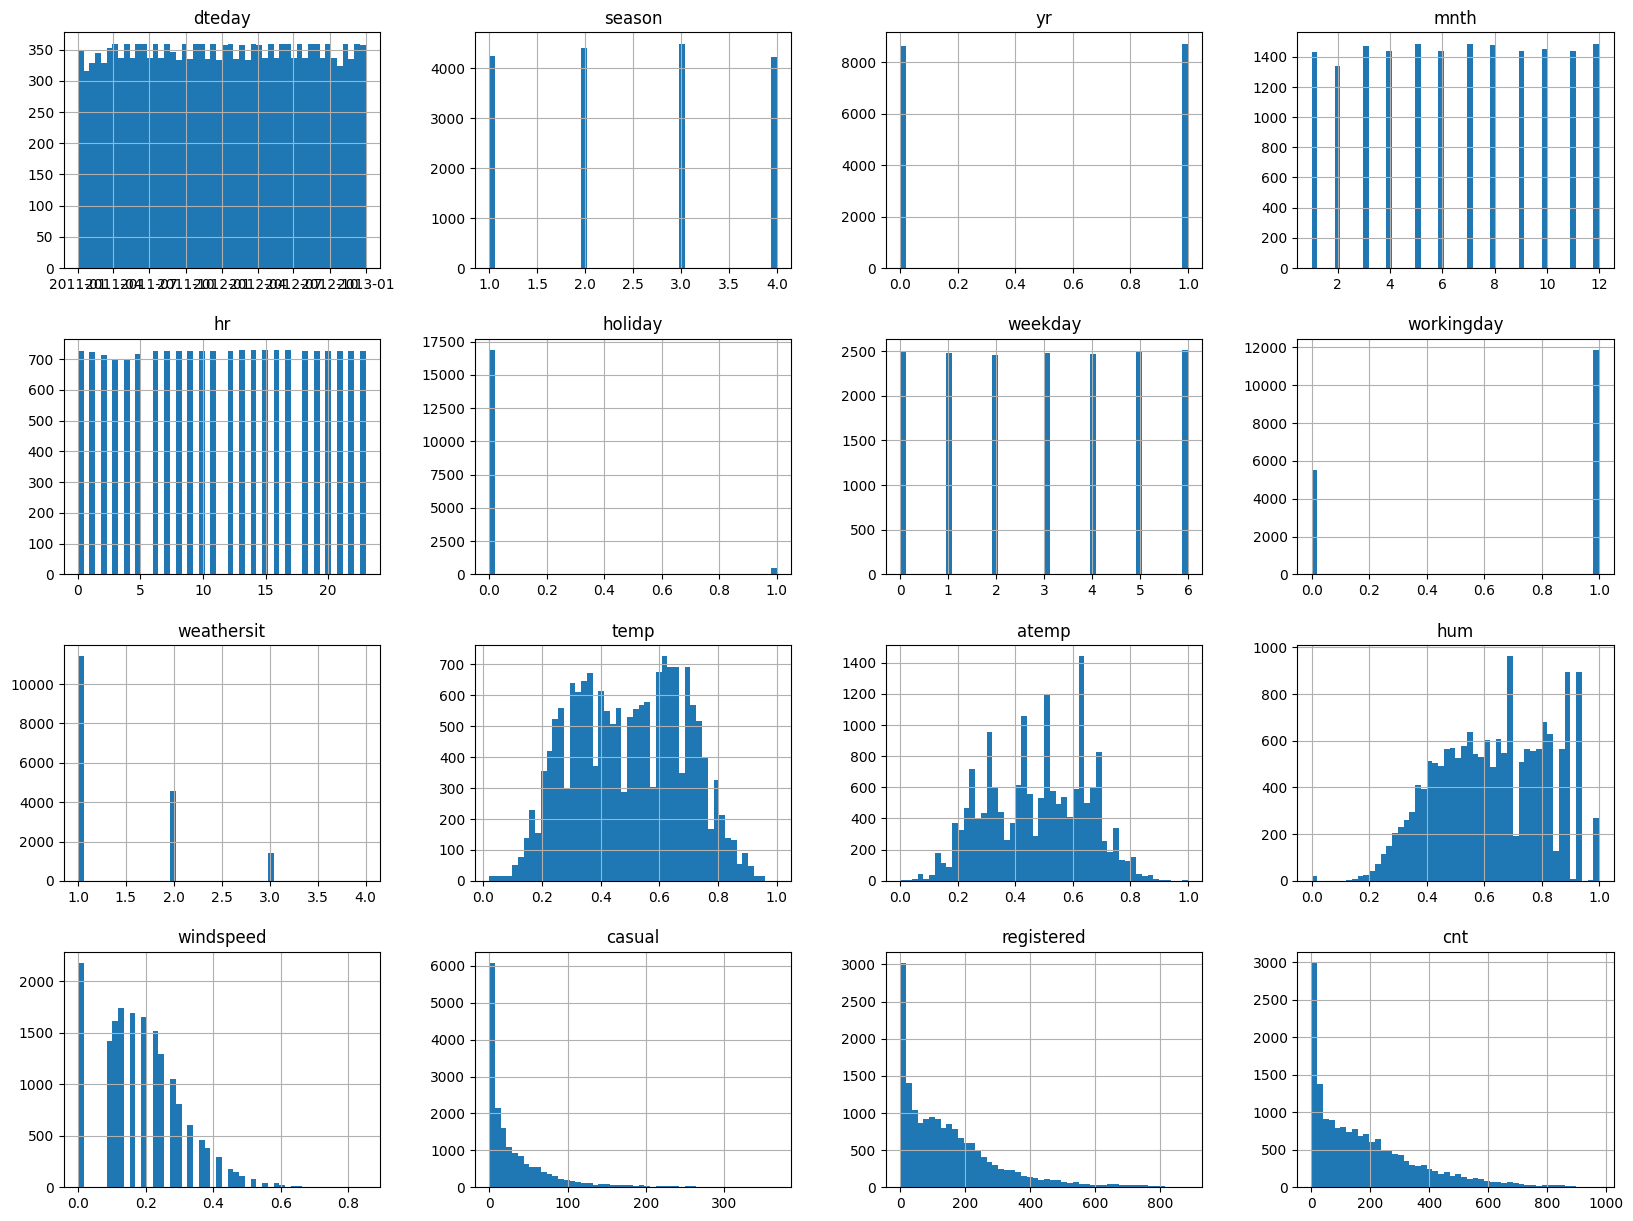

In [ ]:
df_hour.hist(bins=50, figsize=(20,15))
plt.show()

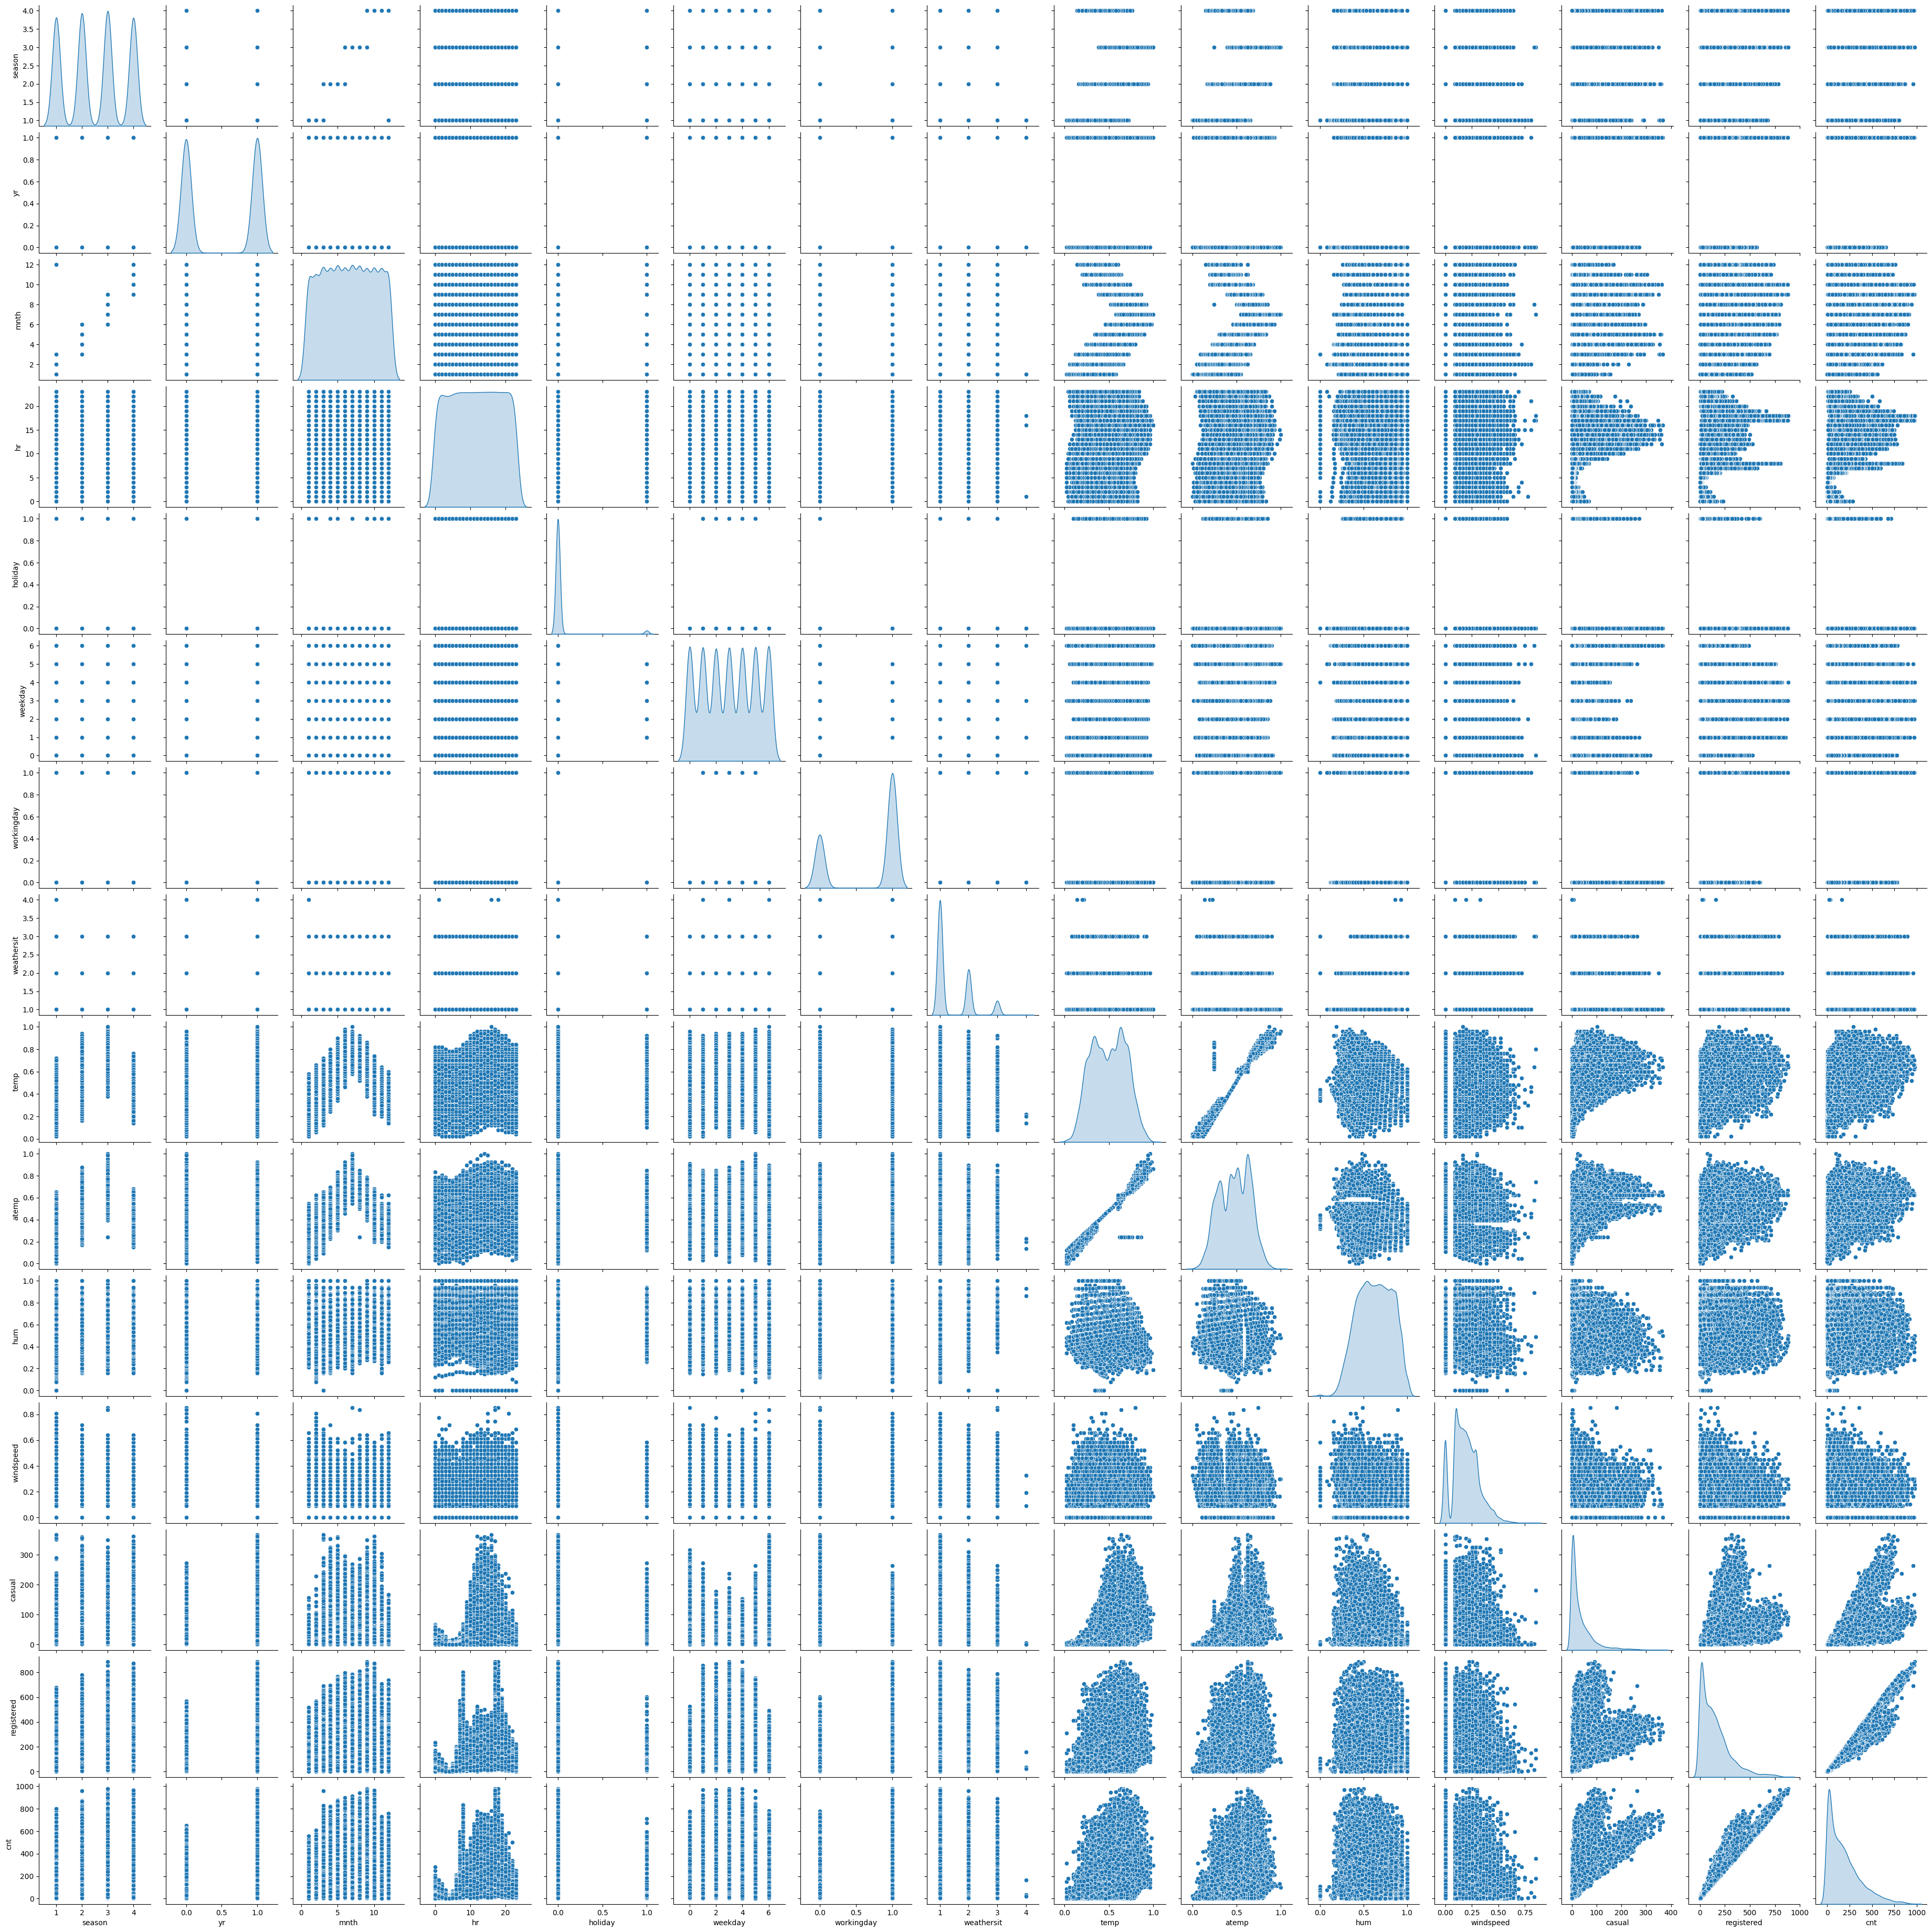

In [ ]:
sns.pairplot(df_hour, diag_kind='kde')

<Axes: >

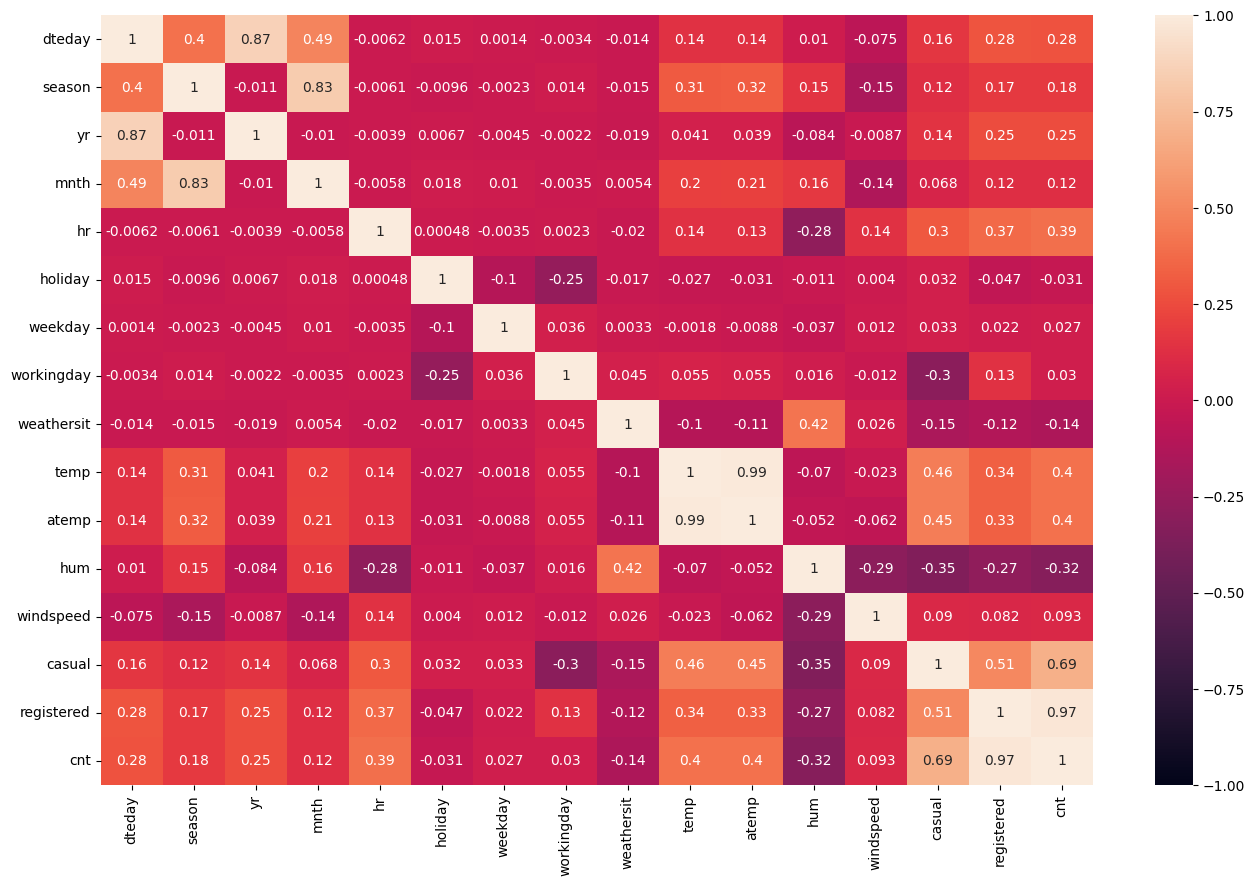

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_hour.corr(), vmin = -1, vmax = 1, annot= True)

**Insight:**
- Data cenderung masuk ke Distribusi Normal.
- Terdapat beberapa data yang memiliki korelasi dengan jumlah customer seperti temp, atemp, hr, dan lain-lain yang nantinya bisa dijadikan bahan dalam analisis data.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor yang mempengaruhi total rental bikes?

In [ ]:
df_hour.groupby(by=['yr', 'mnth']).agg({'casual':'mean', 'registered':'mean', 'cnt':'mean'})
#var1 = df_hour.groupby(['yr', 'mnth'])[['casual', 'registered', 'cnt']].mean().reset_index()
#var1.sort_values(by='cnt', ascending = False)

casual  registered         cnt
yr mnth                                   
0  1      4.466570   51.040698   55.507267
   2      9.617874   64.673344   74.291217
   3     17.569863   70.163014   87.732877
   4     31.079277  100.867872  131.947149
   5     41.733871  140.821237  182.555108
   6     42.516667  156.805556  199.322222
   7     48.994624  140.979839  189.974462
   8     39.455540  147.536252  186.991792
   9     37.022315  140.687587  177.709902
   10    33.946164  132.286676  166.232840
   11    21.688456  120.407510  142.095967
   12    11.400810  106.443995  117.844804
1  1     12.103914  118.454791  130.558704
   2     12.602601  136.439306  149.041908
   3     42.554509  179.349933  221.904441
   4     53.559889  189.091922  242.651811
   5     59.455645  203.803763  263.259409
   6     60.130556  221.577778  281.708333
   7     56.055108  217.610215  273.665323
   8     58.060484  230.250000  288.310484
   9     60.802778  242.770833  303.573611
   10    48.782486  232.066384  280.848870
   11    29.260446  183.363510  212.623955
   12    17.850404  148.878706  166.729111

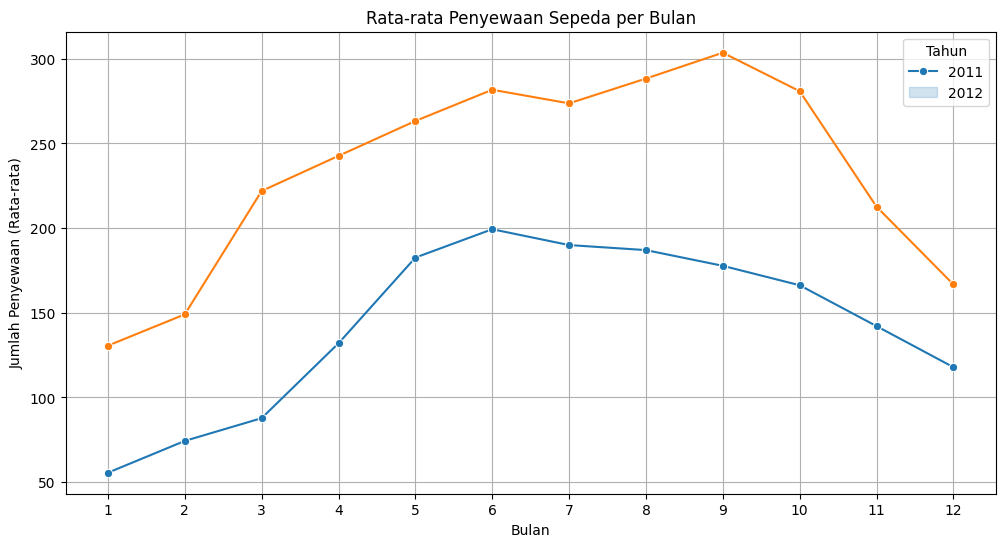

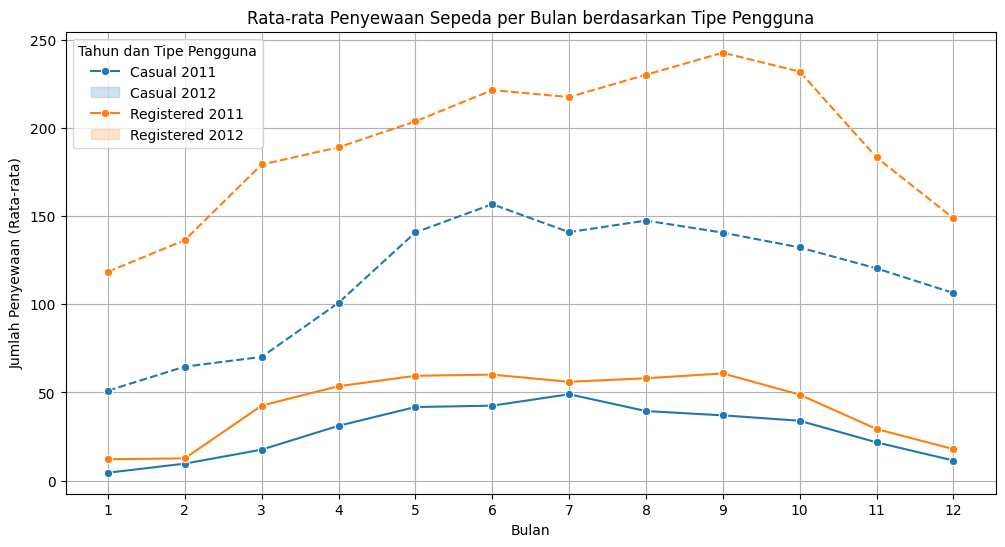

In [ ]:
data_agg = df_hour.groupby(by=['yr', 'mnth']).agg({'casual':'mean', 'registered':'mean', 'cnt':'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_agg, x='mnth', y='cnt', hue='yr', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.xticks(range(1, 13))
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_agg, x='mnth', y='casual', hue='yr', marker='o')
sns.lineplot(data=data_agg, x='mnth', y='registered', hue='yr', marker='o', linestyle='--')
plt.title('Rata-rata Penyewaan Sepeda per Bulan berdasarkan Tipe Pengguna')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.xticks(range(1, 13))
plt.legend(title='Tahun dan Tipe Pengguna', labels=['Casual 2011', 'Casual 2012', 'Registered 2011', 'Registered 2012'])
plt.grid(True)
plt.show()

In [ ]:
df_grouped = df_hour.groupby(['yr', 'dteday'])[['cnt', 'casual', 'registered']].sum().reset_index()
df_year_0 = df_grouped[df_grouped['yr'] == 0].sort_values(by='cnt', ascending=False).head(20)
df_year_1 = df_grouped[df_grouped['yr'] == 1].sort_values(by='cnt', ascending=False).head(20)
df_combined = pd.concat([df_year_0, df_year_1])
print(df_combined)

     yr     dteday   cnt  casual  registered
184   0 2011-07-04  6043    3065        2978
196   0 2011-07-16  5923    2418        3505
234   0 2011-08-23  5895    1281        4614
140   0 2011-05-21  5805    2258        3547
195   0 2011-07-15  5538    1318        4220
180   0 2011-06-30  5515    1027        4488
281   0 2011-10-09  5511    2397        3114
266   0 2011-09-24  5423    1776        3647
280   0 2011-10-08  5409    2235        3174
181   0 2011-07-01  5362    1246        4116
252   0 2011-09-10  5345    1750        3595
154   0 2011-06-04  5342    1869        3473
189   0 2011-07-09  5336    1988        3348
153   0 2011-06-03  5312     898        4414
119   0 2011-04-30  5312    1965        3347
176   0 2011-06-26  5305    1920        3385
197   0 2011-07-17  5302    2006        3296
179   0 2011-06-29  5225     848        4377
287   0 2011-10-15  5217    1899        3318
241   0 2011-08-30  5204     775        4429
623   1 2012-09-15  8714    3160        5554
637   1 20

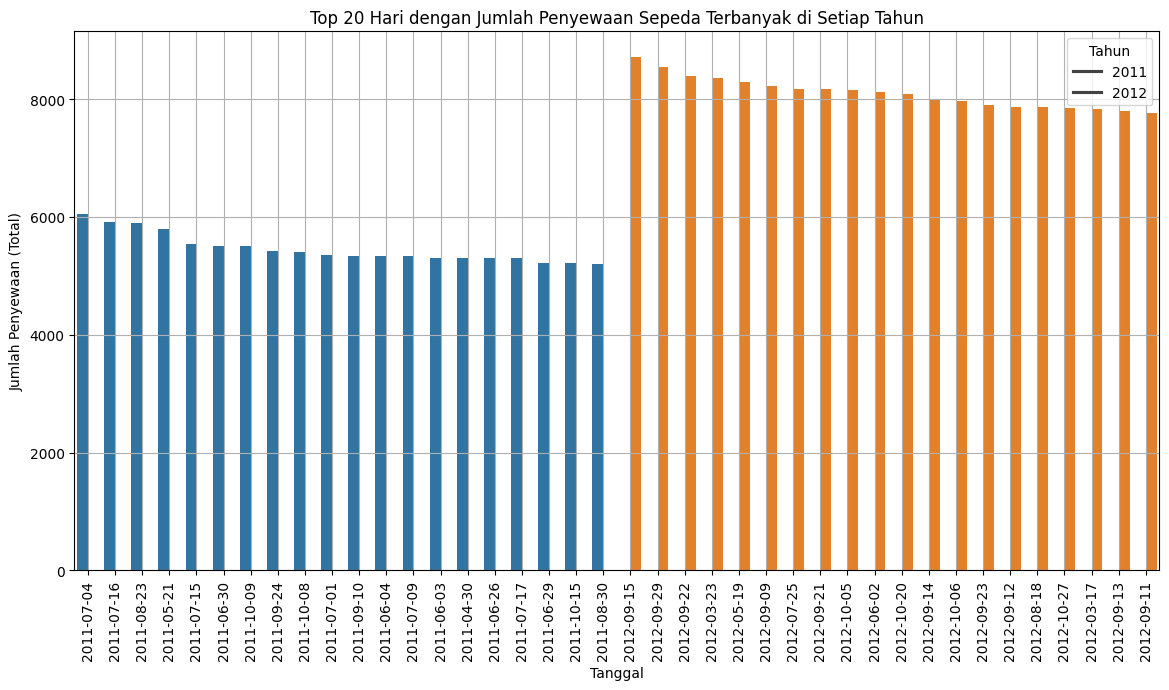

In [ ]:
df_grouped = df_hour.groupby(['yr', 'dteday'])[['cnt', 'casual', 'registered']].sum().reset_index()
df_year_0 = df_grouped[df_grouped['yr'] == 0].sort_values(by='cnt', ascending=False).head(20)
df_year_1 = df_grouped[df_grouped['yr'] == 1].sort_values(by='cnt', ascending=False).head(20)
df_combined = pd.concat([df_year_0, df_year_1])

plt.figure(figsize=(14, 7))
sns.barplot(data=df_combined, x='dteday', y='cnt', hue='yr', dodge=True)
plt.title('Top 20 Hari dengan Jumlah Penyewaan Sepeda Terbanyak di Setiap Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan (Total)')
plt.xticks(rotation=90)
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.grid(True)
plt.show()

In [ ]:
df_grouped = df_hour.groupby(['yr', 'dteday'])[['cnt', 'casual', 'registered']].sum().reset_index()
df_year_0 = df_grouped[df_grouped['yr'] == 0].sort_values(by='cnt', ascending=True).head(20)
df_year_1 = df_grouped[df_grouped['yr'] == 1].sort_values(by='cnt', ascending=True).head(20)
df_combined = pd.concat([df_year_0, df_year_1])
print(df_combined)

     yr     dteday   cnt  casual  registered
26    0 2011-01-27   431      15         416
25    0 2011-01-26   506      34         472
64    0 2011-03-06   605     114         491
68    0 2011-03-10   623      46         577
301   0 2011-10-29   627      57         570
17    0 2011-01-18   683       9         674
340   0 2011-12-07   705      50         655
358   0 2011-12-25   754     303         451
105   0 2011-04-16   795     121         674
1     0 2011-01-02   801     131         670
8     0 2011-01-09   822      54         768
7     0 2011-01-08   959      68         891
21    0 2011-01-22   981      93         888
0     0 2011-01-01   985     331         654
22    0 2011-01-23   986     150         836
16    0 2011-01-17  1000     117         883
35    0 2011-02-05  1005     100         905
357   0 2011-12-24  1011     155         856
29    0 2011-01-30  1096     140         956
28    0 2011-01-29  1098     123         975
667   1 2012-10-29    22       2          20
725   1 20

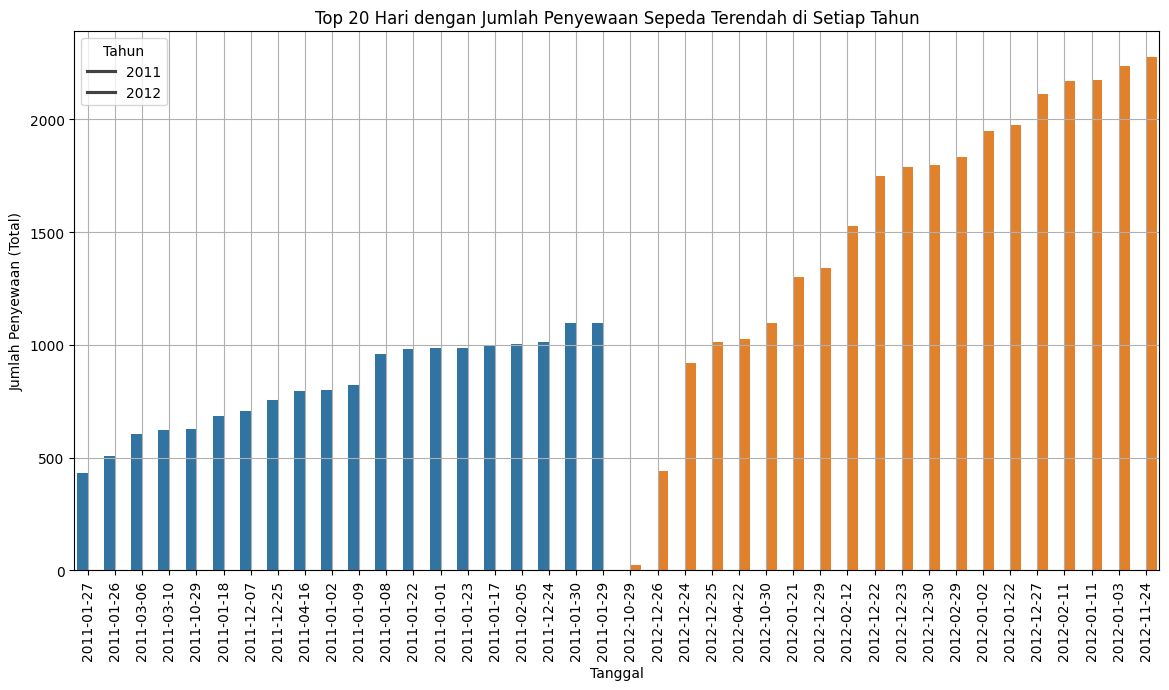

In [ ]:
df_grouped = df_hour.groupby(['yr', 'dteday'])[['cnt', 'casual', 'registered']].sum().reset_index()
df_year_0 = df_grouped[df_grouped['yr'] == 0].sort_values(by='cnt', ascending=True).head(20)
df_year_1 = df_grouped[df_grouped['yr'] == 1].sort_values(by='cnt', ascending=True).head(20)
df_combined = pd.concat([df_year_0, df_year_1])

plt.figure(figsize=(14, 7))
sns.barplot(data=df_combined, x='dteday', y='cnt', hue='yr', dodge=True)
plt.title('Top 20 Hari dengan Jumlah Penyewaan Sepeda Terendah di Setiap Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan (Total)')
plt.xticks(rotation=90)
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.grid(True)
plt.show()

In [ ]:
df_hour.groupby(by=['yr','hr']).agg({'casual':'mean','registered':'mean','cnt':'mean'})

casual  registered         cnt
yr hr                                   
0  0    9.481994   33.565097   43.047091
   1    5.752778   20.797222   26.550000
   2    4.460227   14.463068   18.923295
   3    2.789474    7.271930   10.061404
   4    1.278932    4.112760    5.391691
   5    1.212465   13.396601   14.609065
   6    3.814404   53.806094   57.620499
   7   10.380165  146.451791  156.831956
   8   19.198347  243.796143  262.994490
   9   24.418733  139.454545  163.873278
   10  35.991736   94.892562  130.884298
   11  45.680441  110.236915  155.917355
   12  52.214286  137.890110  190.104396
   13  55.362637  135.129121  190.491758
   14  57.958791  124.684066  182.642857
   15  57.315934  131.118132  188.434066
   16  56.819178  177.761644  234.580822
   17  58.830137  290.846575  349.676712
   18  49.768595  272.504132  322.272727
   19  40.013774  196.355372  236.369146
   20  30.192837  142.859504  173.052342
   21  24.366391  110.275482  134.641873
   22  19.369146   84.424242  103.793388
   23  13.754821   55.435262   69.190083
1  0   10.827397   53.802740   64.630137
   1    7.247253   32.879121   40.126374
   2    5.074380   21.622590   26.696970
   3    2.645070   10.687324   13.332394
   4    1.230556    6.022222    7.252778
   5    1.604396   23.406593   25.010989
   6    4.505495   89.810440   94.315934
   7   11.728022  255.417582  267.145604
   8   24.153846  430.609890  454.763736
   9   37.346154  237.247253  274.593407
   10  56.934066  159.401099  216.335165
   11  73.362637  186.862637  260.225275
   12  84.373626  232.153846  316.527473
   13  89.208219  227.449315  316.657534
   14  93.128767  205.967123  299.095890
   15  92.446575  221.413699  313.860274
   16  90.671233  298.715068  389.386301
   17  89.717808  483.509589  573.227397
   18  72.410959  455.772603  528.183562
   19  57.479452  328.786301  386.265753
   20  42.241096  236.476712  278.717808
   21  32.123288  177.657534  209.780822
   22  25.120548  133.605479  158.726027
   23  16.635616   89.734247  106.369863

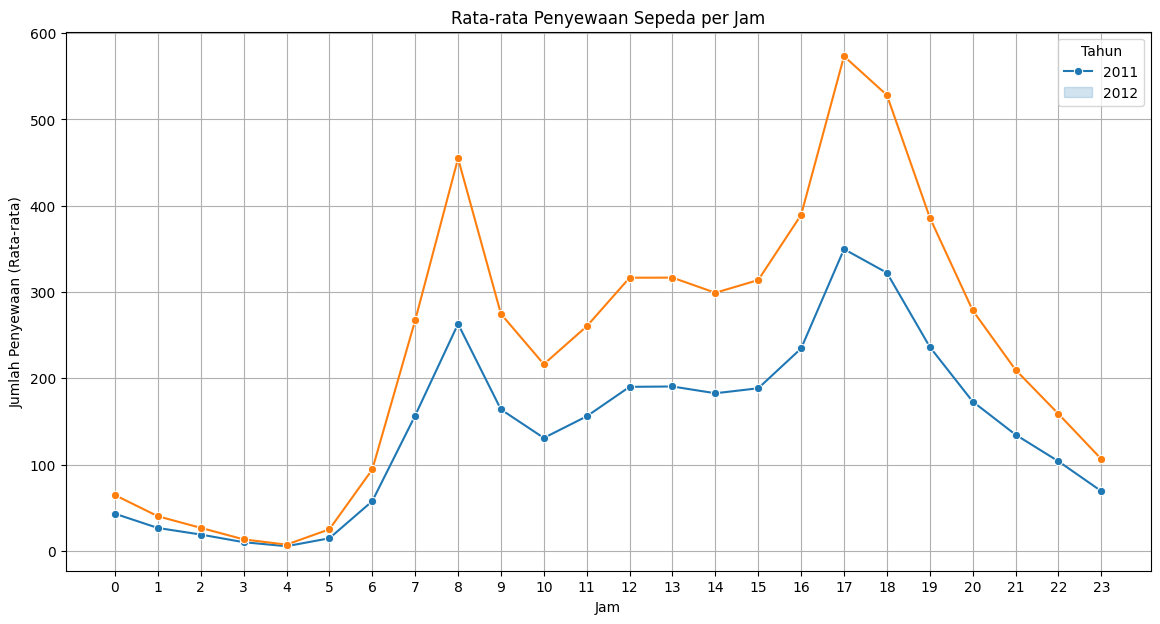

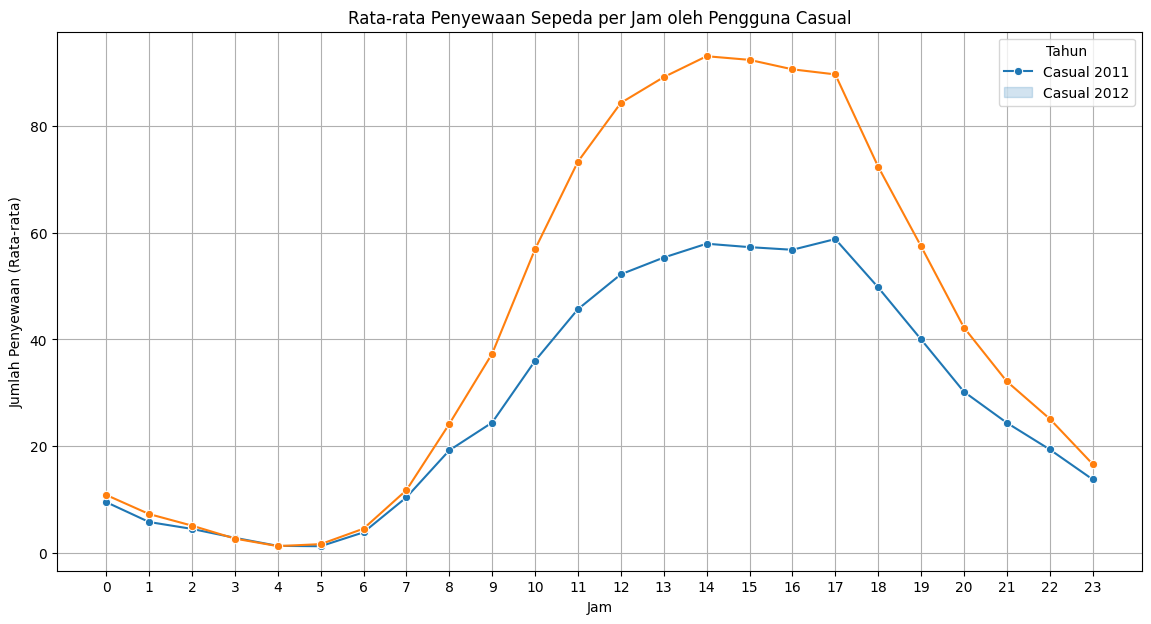

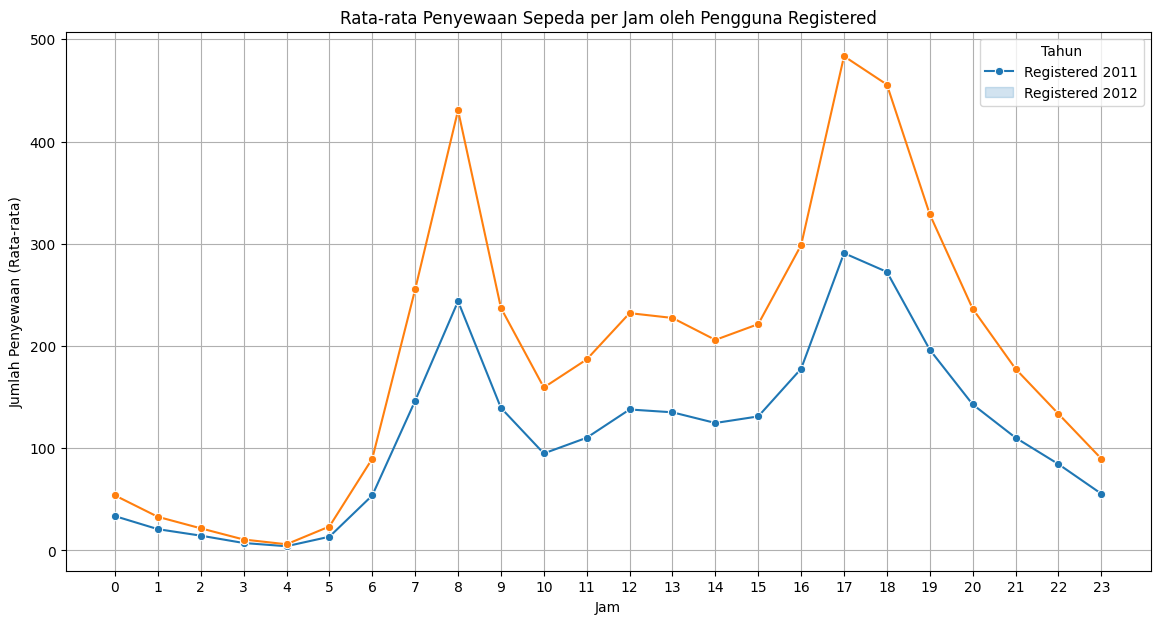

In [ ]:
data_hourly = df_hour.groupby(by=['yr', 'hr']).agg({'casual': 'mean', 'registered': 'mean', 'cnt': 'mean'}).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_hourly, x='hr', y='cnt', hue='yr', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.xticks(range(0, 24))
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_hourly, x='hr', y='casual', hue='yr', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Jam oleh Pengguna Casual')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.xticks(range(0, 24))
plt.legend(title='Tahun', labels=['Casual 2011', 'Casual 2012'])
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_hourly, x='hr', y='registered', hue='yr', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Jam oleh Pengguna Registered')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.xticks(range(0, 24))
plt.legend(title='Tahun', labels=['Registered 2011', 'Registered 2012'])
plt.grid(True)

### Pertanyaan 2: Bagaimana strategi yang bisa dilakukan untuk meningkatkan total rental bikes?

In [ ]:
df_hour.groupby(by=['yr','season']).agg({'casual':'mean','registered':'mean','cnt':'mean'})

casual  registered         cnt
yr season                                   
0  1       10.360251   62.173598   72.533849
   2       35.208352  122.447571  157.655924
   3       42.611607  144.732143  187.343750
   4       24.748360  128.080600  152.828960
1  1       18.029899  129.784269  147.814167
   2       57.097915  201.865367  258.963282
   3       57.908245  226.435284  284.343528
   4       36.686845  209.011916  245.698761

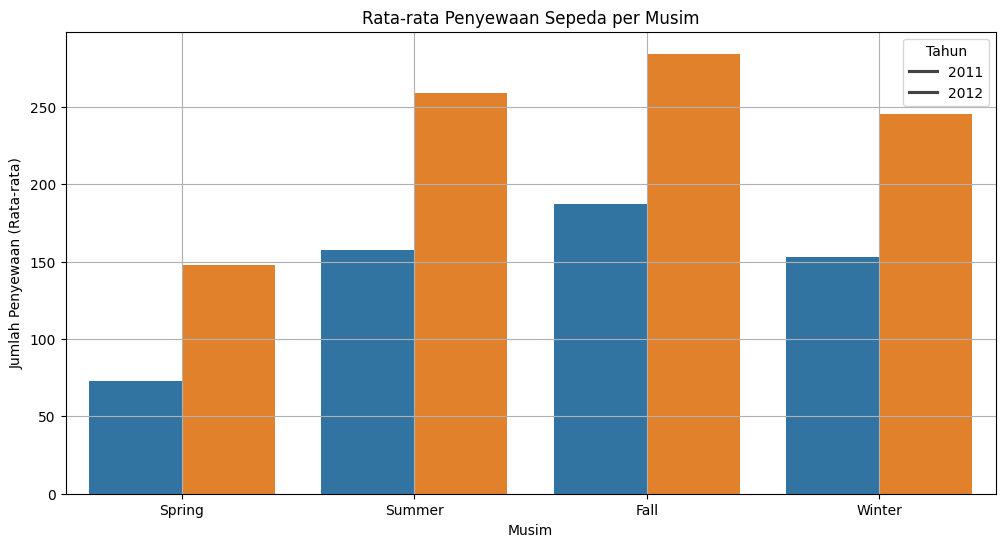

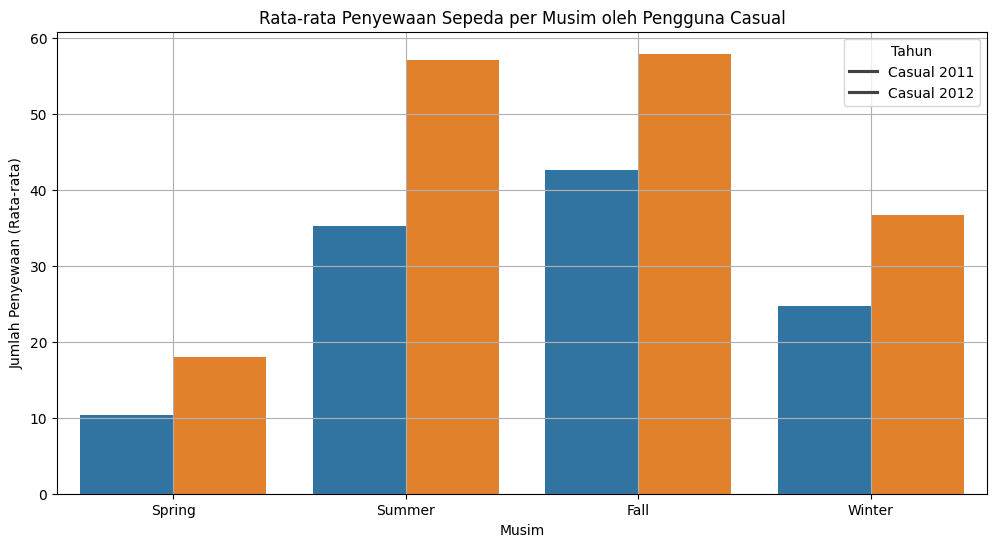

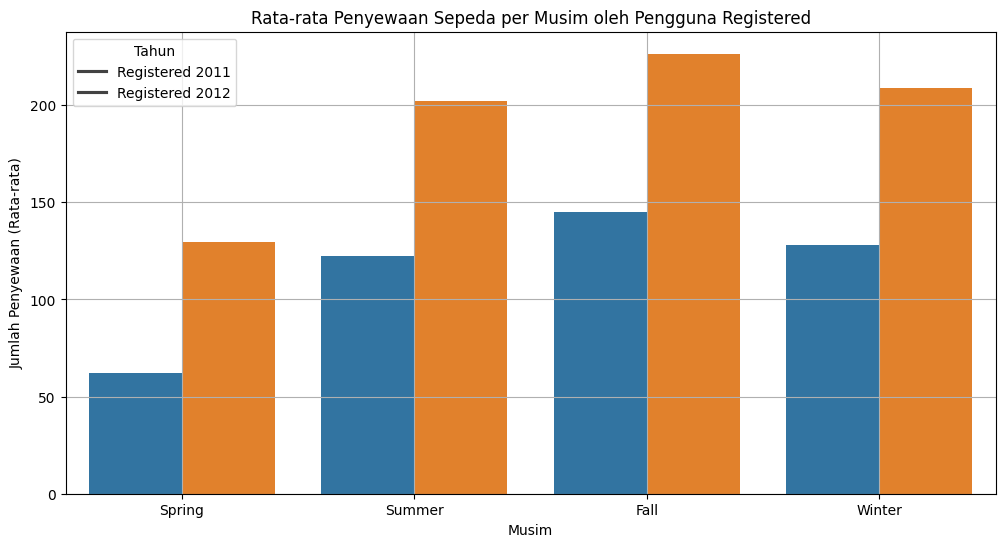

In [ ]:
data_seasonal = df_hour.groupby(by=['yr', 'season']).agg({'casual': 'mean', 'registered': 'mean', 'cnt': 'mean'}).reset_index()

season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
data_seasonal['season'] = data_seasonal['season'].map(season_labels)

plt.figure(figsize=(12, 6))
sns.barplot(data=data_seasonal, x='season', y='cnt', hue='yr', dodge=True)
plt.title('Rata-rata Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=data_seasonal, x='season', y='casual', hue='yr', dodge=True)
plt.title('Rata-rata Penyewaan Sepeda per Musim oleh Pengguna Casual')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.legend(title='Tahun', labels=['Casual 2011', 'Casual 2012'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=data_seasonal, x='season', y='registered', hue='yr', dodge=True)
plt.title('Rata-rata Penyewaan Sepeda per Musim oleh Pengguna Registered')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.legend(title='Tahun', labels=['Registered 2011', 'Registered 2012'])
plt.grid(True)
plt.show()

In [ ]:
df_hour.groupby(by=['yr','windspeed']).agg({'casual':'mean','registered':'mean','cnt':'mean'})

casual  registered         cnt
yr windspeed                                    
0  0.0000      23.971093  100.244806  124.215899
   0.0896      22.456461   92.912921  115.369382
   0.1045      24.649418  103.430789  128.080207
   0.1343      27.414692  110.421801  137.836493
   0.1642      28.806888  113.571956  142.378844
   0.1940      30.168130  123.597240  153.765370
   0.2239      33.508997  126.208226  159.717224
   0.2537      30.931310  128.217252  159.148562
   0.2836      35.812044  127.833942  163.645985
   0.2985      34.341523  131.565111  165.906634
   0.3284      26.322981  117.838509  144.161491
   0.3582      28.163866  134.613445  162.777311
   0.3881      35.951923  135.149038  171.100962
   0.4179      29.315436  123.302013  152.617450
   0.4478      27.567901  114.271605  141.839506
   0.4627      29.280000  124.440000  153.720000
   0.4925      29.649123  117.526316  147.175439
   0.5224      28.275000  120.850000  149.125000
   0.5522      25.789474   82.684211  108.473684
   0.5821      16.380952   80.238095   96.619048
   0.6119      24.923077  125.461538  150.384615
   0.6418      21.600000   68.000000   89.600000
   0.6567      35.000000   61.500000   96.500000
   0.6866       1.000000    2.000000    3.000000
   0.7463      46.000000  134.000000  180.000000
   0.7761       0.000000    5.000000    5.000000
   0.8060       5.000000   50.000000   55.000000
   0.8358       2.000000   14.000000   16.000000
   0.8507     127.500000  142.000000  269.500000
1  0.0000      34.298229  163.927307  198.225536
   0.0896      29.514727  155.143058  184.657784
   0.1045      31.689573  169.513033  201.202607
   0.1343      35.837808  176.789709  212.627517
   0.1642      42.320862  203.987528  246.308390
   0.1940      44.473256  199.545349  244.018605
   0.2239      49.534694  217.700680  267.235374
   0.2537      54.908819  210.043348  264.952167
   0.2836      54.768000  217.640000  272.408000
   0.2985      57.022444  207.940150  264.962594
   0.3284      50.982143  207.103571  258.085714
   0.3582      50.477477  210.207207  260.684685
   0.3881      51.745665  233.167630  284.913295
   0.4179      59.414966  217.034014  276.448980
   0.4478      47.157895  217.273684  264.431579
   0.4627      42.704225  199.619718  242.323944
   0.4925      40.890909  200.036364  240.927273
   0.5224      48.159091  201.568182  249.727273
   0.5522      25.200000  185.850000  211.050000
   0.5821      30.739130  193.956522  224.695652
   0.6119      26.400000  147.600000  174.000000
   0.6418      28.666667  147.666667  176.333333
   0.6567      25.714286  220.857143  246.571429
   0.6866      28.250000  118.250000  146.500000
   0.7164      47.000000   93.500000  140.500000
   0.8060       1.000000  151.000000  152.000000

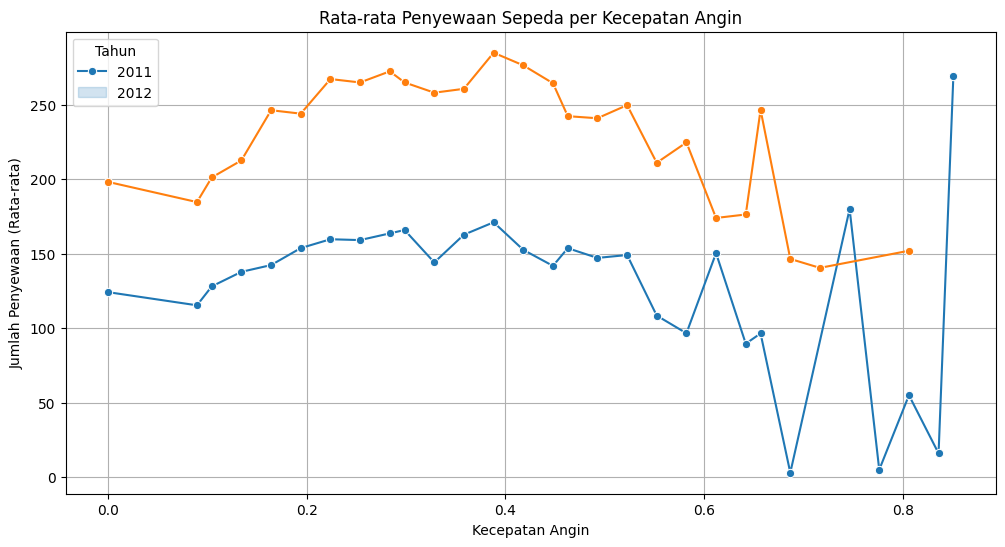

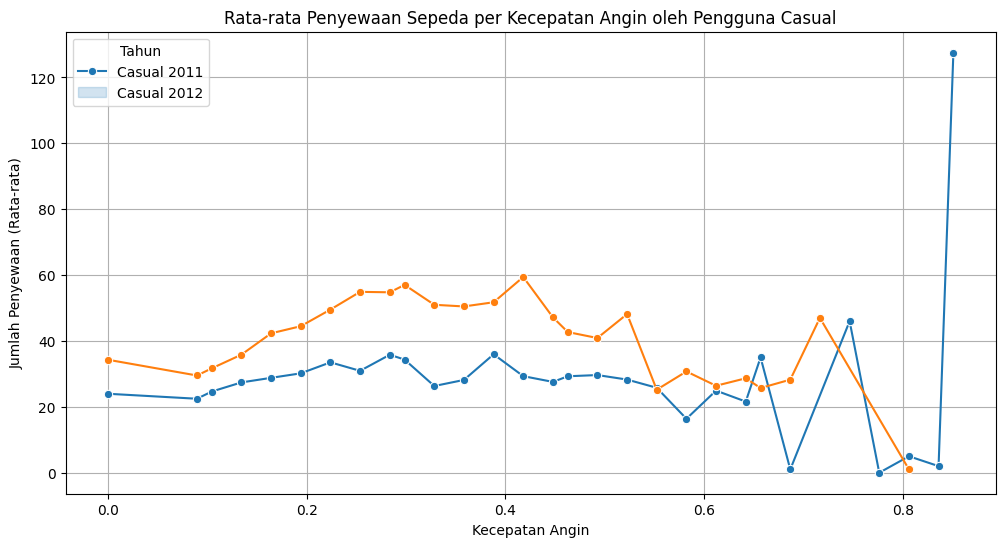

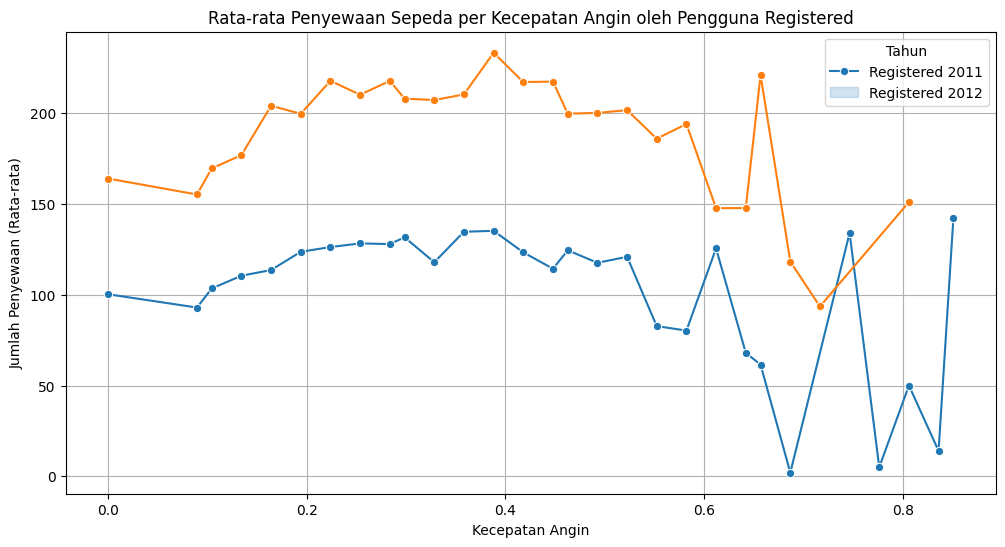

In [ ]:
data_windspeed = df_hour.groupby(by=['yr', 'windspeed']).agg({'casual': 'mean', 'registered': 'mean', 'cnt': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_windspeed, x='windspeed', y='cnt', hue='yr', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Kecepatan Angin')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_windspeed, x='windspeed', y='casual', hue='yr', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Kecepatan Angin oleh Pengguna Casual')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.legend(title='Tahun', labels=['Casual 2011', 'Casual 2012'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_windspeed, x='windspeed', y='registered', hue='yr', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Kecepatan Angin oleh Pengguna Registered')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.legend(title='Tahun', labels=['Registered 2011', 'Registered 2012'])
plt.grid(True)
plt.show()

In [ ]:
df_hour.groupby(by=['weekday']).agg({'casual':'mean','registered':'mean','cnt':'mean'})

casual  registered         cnt
weekday                                   
0        56.163469  121.305356  177.468825
1        28.553449  155.191206  183.744655
2        23.580514  167.658377  191.238891
3        23.159192  167.971313  191.130505
4        24.872521  171.564144  196.436665
5        31.458786  164.677121  196.135907
6        61.246815  128.962978  190.209793

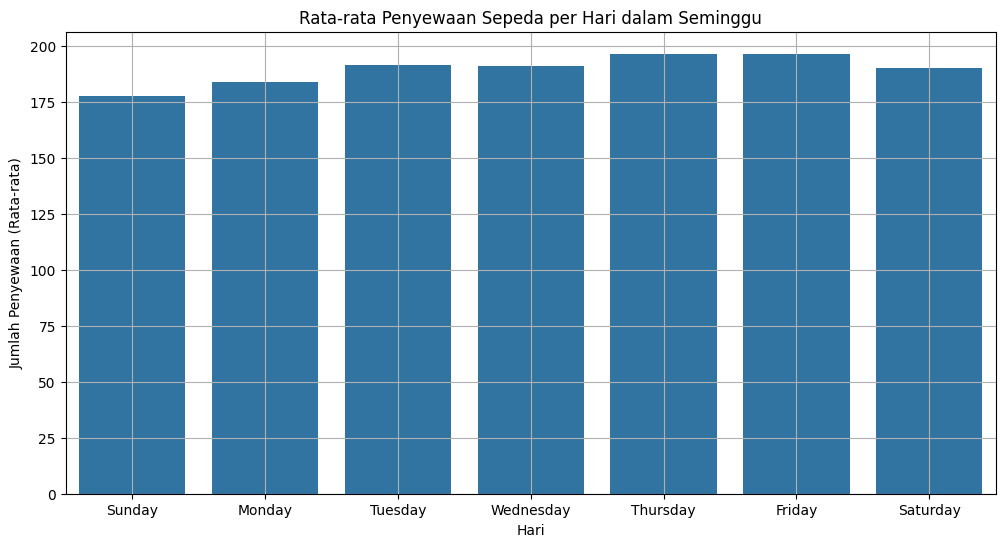

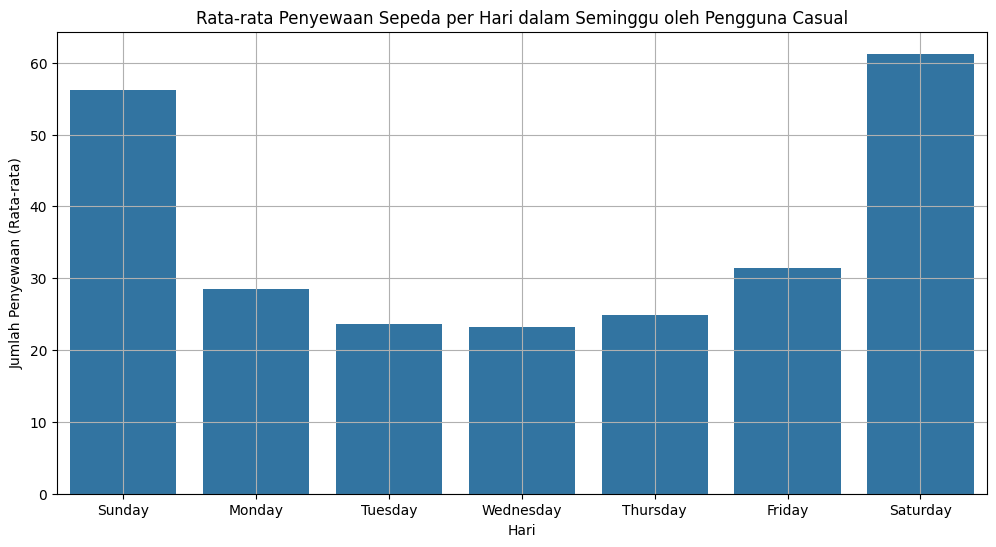

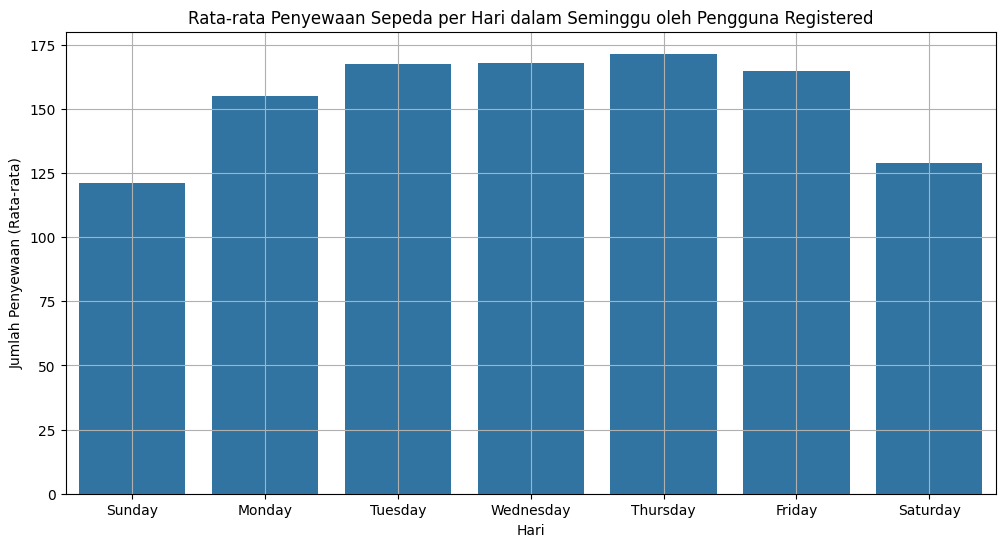

In [ ]:
data_weekday = df_hour.groupby(by=['weekday']).agg({'casual': 'mean', 'registered': 'mean', 'cnt': 'mean'}).reset_index()

weekday_labels = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
data_weekday['weekday'] = data_weekday['weekday'].map(weekday_labels)

plt.figure(figsize=(12, 6))
sns.barplot(data=data_weekday, x='weekday', y='cnt', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Rata-rata Penyewaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=data_weekday, x='weekday', y='casual', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Rata-rata Penyewaan Sepeda per Hari dalam Seminggu oleh Pengguna Casual')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=data_weekday, x='weekday', y='registered', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Rata-rata Penyewaan Sepeda per Hari dalam Seminggu oleh Pengguna Registered')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.grid(True)
plt.show()

In [ ]:
df_hour.groupby(by=['yr','temp']).agg({'casual':'mean','registered':'mean','cnt':'mean'})

casual  registered         cnt
yr temp                                    
0  0.02    1.000000   15.800000   16.800000
   0.04    1.500000   26.142857   27.642857
   0.06    2.466667   38.066667   40.533333
   0.08    2.250000   27.500000   29.750000
   0.10    1.531250   37.812500   39.343750
...             ...         ...         ...
1  0.92   87.580645  278.387097  365.967742
   0.94   73.375000  199.250000  272.625000
   0.96   84.300000  234.200000  318.500000
   0.98   82.000000  457.000000  539.000000
   1.00  102.000000  192.000000  294.000000

[98 rows x 3 columns]

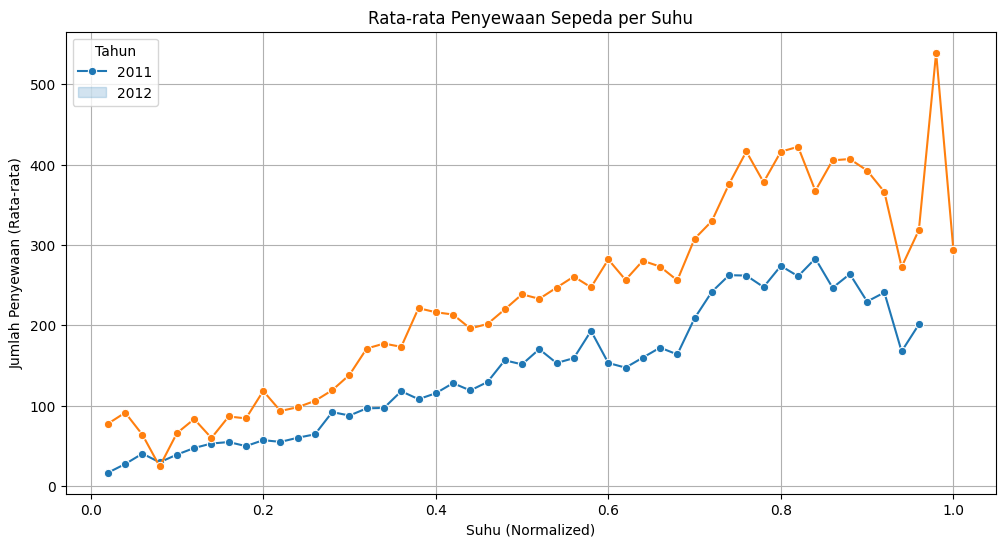

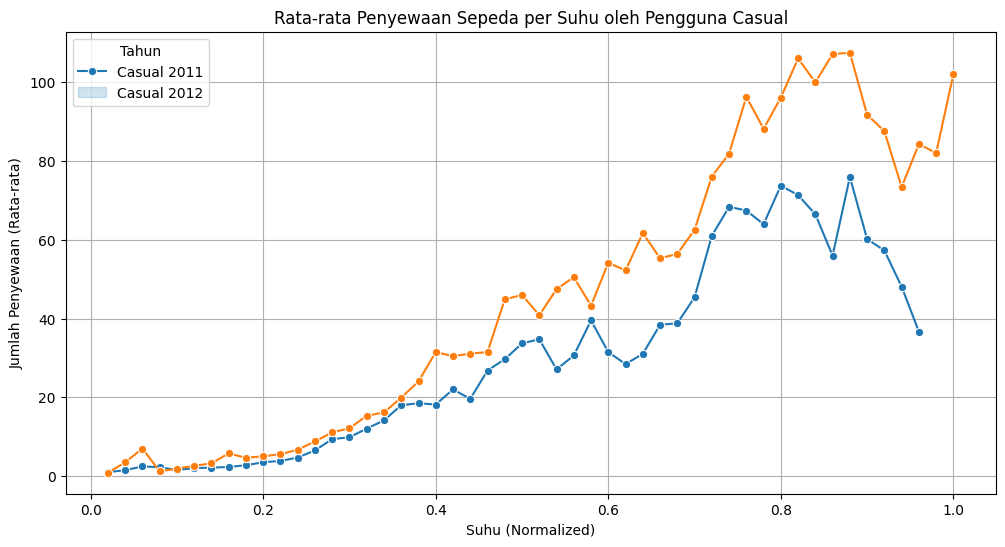

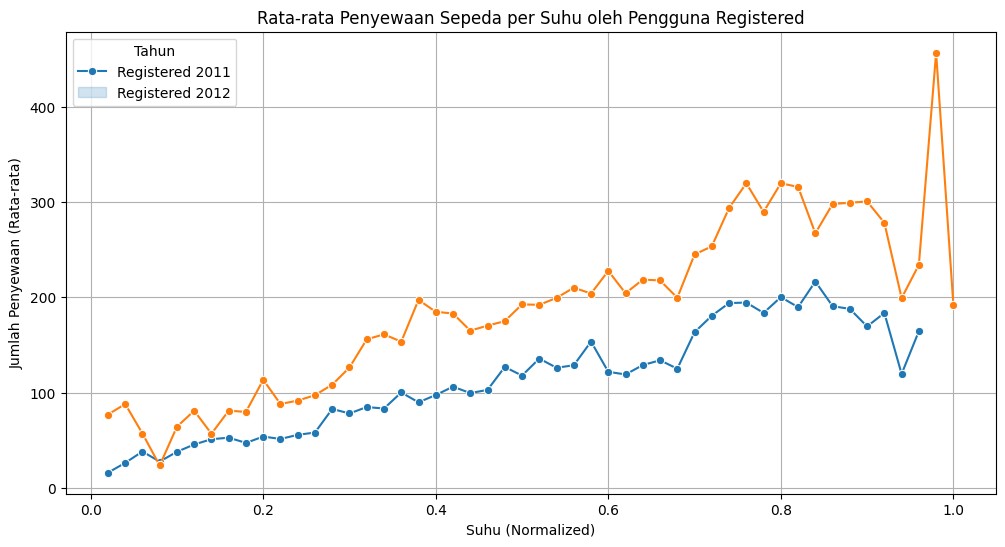

In [ ]:
data_temp = df_hour.groupby(by=['yr','temp']).agg({'casual': 'mean', 'registered': 'mean', 'cnt': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_temp, x='temp', y='cnt', hue='yr', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Suhu')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_temp, x='temp', y='casual', hue='yr', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Suhu oleh Pengguna Casual')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.legend(title='Tahun', labels=['Casual 2011', 'Casual 2012'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_temp, x='temp', y='registered', hue='yr', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Suhu oleh Pengguna Registered')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan (Rata-rata)')
plt.legend(title='Tahun', labels=['Registered 2011', 'Registered 2012'])
plt.grid(True)

In [ ]:
df_seasonfiltered = df_hour[(df_hour['season'] == 3)]
average_customers = df_seasonfiltered.groupby('temp')[['cnt', 'casual', 'registered']].mean()
print(average_customers)

             cnt      casual  registered
temp                                    
0.38   62.500000    4.000000   58.500000
0.40   79.750000    5.500000   74.250000
0.42  161.000000   11.666667  149.333333
0.44   51.454545    5.818182   45.636364
0.46  111.521739   14.826087   96.695652
0.48  122.181818   17.363636  104.818182
0.50  143.512821   19.076923  124.435897
0.52  208.372549   34.254902  174.117647
0.54  129.323232   14.949495  114.373737
0.56  155.586957   21.641304  133.945652
0.58  156.393443   24.475410  131.918033
0.60  143.222772   20.247525  122.975248
0.62  141.682657   19.712177  121.970480
0.64  156.008596   26.833811  129.174785
0.66  172.219114   31.976690  140.242424
0.68  167.926407   33.679654  134.246753
0.70  212.976496   39.194444  173.782051
0.72  255.242054   56.823961  198.418093
0.74  301.101781   68.366412  232.735369
0.76  337.675079   78.151420  259.523659
0.78  307.404255   71.645390  235.758865
0.80  338.806452   84.498208  254.308244
0.82  338.073864

**Insight:**
1. jumlah customer pada setiap bulan hampir merata dan mengalami peningkatan dari tahun 2011 ke 2012
2. dilihat dari jumlah penyewaan perhari dari tahun 2011 hingga 2012
- Pada tanggal 4 Juli 2011 dimana adalah hari kemerdekaan tanggal 4 Juli 2011 tampaknya memiliki jumlah penyewaan yang sangat tinggi. Ini adalah hari Independence Day di Amerika Serikat, yang biasanya dirayakan dengan berbagai perayaan di Washington, DC, termasuk parade, konser musik, dan upacara ledakan di Washington Monument sehingga memungkinkan masyarakat melakukan penyewaan lebih banyak dari hari biasa.
- Terjadi lonjakan penurunan yang signifikan yaitu pada tanggal 29 Oktober 2012 dimana terjadinya badai sandy yang mengakibatkan masyarakat tidak memungkinkan melakukan aktifitas bersepeda
3. penyewaan banyak dilakukan pada jam kerja seperti keberangkatan kerja, jam makan siang, dan jam pulang kerja
4. penyewaan lebih banyak dilakukan pada season summer dan fall, sedangkan season springer selalu menempati posisi season dengan tingkat penyewaan sepeda terendah di tahun 2011 dan 2012. (Suhu udara memberikan dampak pada penyewaan)
5. windspeed tidak begitu mempengaruhi penyewaan sepeda
6. casual lebih sering melakukan penyewaan pada hari sabtu dan minggu, sebaliknya registered lebih sring melakukan penyewaan di hari-hari kerja yaitu senin sampai jumat.
7. semakin tinggi suhu udara/suhu yang dirasakan semakin banyak penyewaan yang dilakukan baik dari casual maupun registered


## Conclusion

**Pertanyaan 1**
Terdapat beberapa hal yang mempengaruhi kegiatan penyewaan sepeda yakni sebagai berikut
1. keadaan lingkungan (terjadinya badai membuat masyarakat tidak bisa beraktifitas sehingga penyewaan sepeda sangat minim di hari itu dan kegiatan besar seperti hari kemerdekaan mengakibatkan peningkatan penyewaan karena terdapat acara yang ingin diikuti oleh masyarakat)
2. jam kerja (masyarakat melakukan penyewaan dilakukan untuk keberangkatan  kerja, jam istirahat, dan jam pulang kerja)
3. suhu udara sangat mempengaruhi penyewaan sehingga semakin tinggi suhu udara maka semakin banyak masyarakat yang melakukan penyewaan.
4. Musim juga mempengaruhi keinginan masyarakat dalam penyewaan, pada musim semi masyarakat enggan menyewa karena suhu cendenrung lebih dingin dan cuaca yang tidak menentu

**Pertanyaan 2**
Hal-hal yang dapat dilakukan untuk meningkatkan jumlah penyewaan adalah sebagai berikut:
1. Mengadakan promo musiman
Tawarkan diskon atau promosi spesial selama musim semi untuk mendorong penyewaan di musim tersebut, mengingat penyewaan paling sedikit terjadi pada musim ini. Serta pertimbangkan untuk menyediakan informasi cuaca dalam aplikasi atau sistem penyewaan sepeda, sehingga pengguna dapat merencanakan perjalanan mereka lebih baik.
2. Mengoptimalkan ketersediaan sepeda selama jam sibuk seperti saat keberangkatan kerja, jam makan siang, dan jam pulang kerja. Selain itu bisa juga menyediakan lebih banyak sepeda di dekat area bisnis atau perkantoran pada jam kerja untuk memenuhi permintaan tinggi.
3. Tawarkan paket langganan mingguan atau bulanan kepada pengguna casual yang lebih sering menggunakan sepeda pada akhir pekan.
4. Strategi Penempatan Sepeda:
Pastikan penempatan sepeda di lokasi-lokasi strategis berdasarkan analisis pola penyewaan, seperti dekat tempat-tempat kerja, tempat wisata, dan tempat dilaksanakannya acara-acara besar.


In [ ]:
!pip freeze > requirements.txt